In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Explores the dataset
df = pd.read_csv('Spotify Youtube Dataset.csv')
df.head()
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

Question 1: "Which of the top 10 artists from each platform do both platforms share?"

In [4]:
# Finds the top 10 artists for Spotify and YouTube
top_spotify = df.groupby('Artist')['Stream'].sum().nlargest(10)
top_youtube = df.groupby('Artist')['Views'].sum().nlargest(10)
print('Top 10 Spotify Artists:')
print(top_spotify)
print(" ")
print('Top 10 YouTube Artists:')
print(top_youtube)

Top 10 Spotify Artists:
Artist
Post Malone        1.525126e+10
Ed Sheeran         1.439488e+10
Dua Lipa           1.340808e+10
XXXTENTACION       1.322435e+10
The Weeknd         1.303197e+10
Justin Bieber      1.209777e+10
Imagine Dragons    1.185831e+10
Coldplay           1.177848e+10
Khalid             1.138684e+10
Bruno Mars         1.089786e+10
Name: Stream, dtype: float64
 
Top 10 YouTube Artists:
Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099106e+10
Daddy Yankee               1.087193e+10
Bruno Mars                 1.024092e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64


In [5]:
# Finds the shared artists in both top 10 lists
shared_artists = set(top_spotify.index) & set(top_youtube.index)
print('Shared Top 10 Artists:')
print(shared_artists)

Shared Top 10 Artists:
{'Justin Bieber', 'Coldplay', 'Ed Sheeran', 'Bruno Mars'}


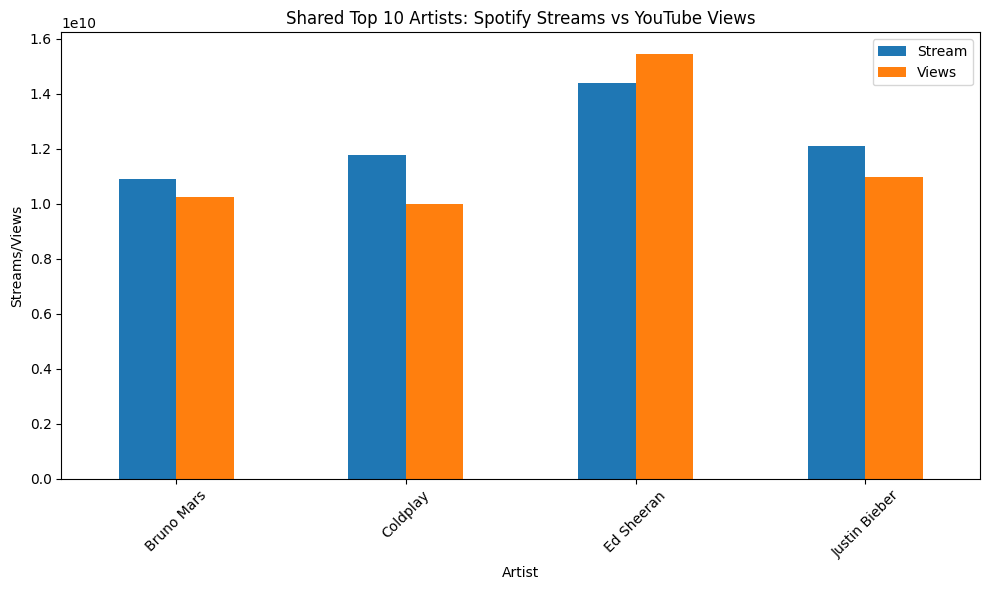

In [6]:
# Visualizes shared artists with a bar chart
shared_df = df[df['Artist'].isin(shared_artists)].groupby('Artist')[['Stream','Views']].sum()
shared_df.plot(kind='bar', figsize=(10,6))
plt.title('Shared Top 10 Artists: Spotify Streams vs YouTube Views')
plt.ylabel('Streams/Views')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 2: "Is there a correlation between Spotify streams and YouTube views for each track?"

In [7]:
# Keeps rows that keep both numbers
df_clean = df.dropna(subset=["Stream", "Views"])

'''Checks the relationship between Spotify streams and YouTube views; 1 is perfect, 0 is none, 
-1 is perfect negative'''

youtube_spotify_correlation = df_clean["Stream"].corr(df_clean["Views"])

print(f"Correlation between Spotify streams and YouTube views: {youtube_spotify_correlation:.4f}")

Correlation between Spotify streams and YouTube views: 0.6019


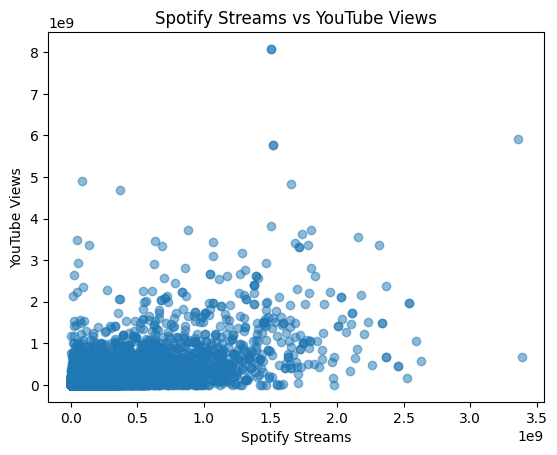

In [8]:
#Visualizes this correlation with a scatter plot
plt.scatter(df_clean["Stream"], df_clean["Views"], alpha=0.5)
plt.xlabel("Spotify Streams")
plt.ylabel("YouTube Views")
plt.title("Spotify Streams vs YouTube Views")
plt.show()


Question 3: "Are singles streamed more on Spotify, on average, than songs from albums or vice versa?"

Album_type
album          1.499782e+08
compilation    8.400785e+07
single         1.016708e+08
Name: Stream, dtype: float64


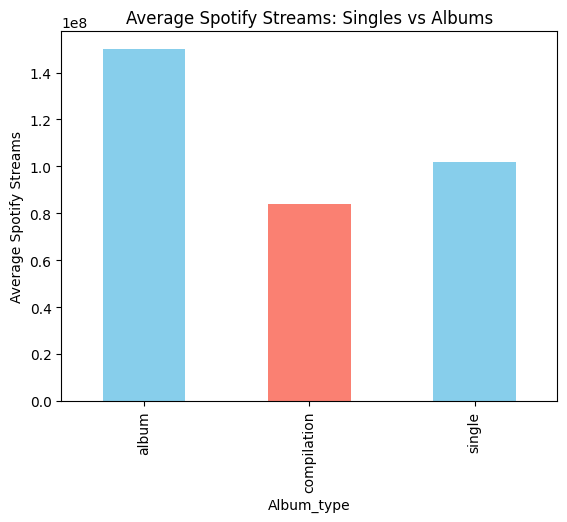

In [9]:
# Drops rows with missing Album_type or Stream values
df_type = df.dropna(subset=["Album_type", "Stream"])

# Calculates the average Spotify streams for singles and albums
avg_streams = df_type.groupby("Album_type")["Stream"].mean()
print(avg_streams)

# Visualizes the result with a bar plot
avg_streams.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Average Spotify Streams')
plt.title('Average Spotify Streams: Singles vs Albums')
plt.show()

Question 4: "Are tracks with louder average volume (higher Loudness) less popular on YouTube in terms of views and Spotify in terms of streams?"

In [10]:
# Drops rows with missing Loudness, Views, or Stream values
df_loudness = df.dropna(subset=["Loudness", "Views", "Stream"])
# Correlation between Loudness and YouTube Views
corr_loudness_views = df_loudness["Loudness"].corr(df_loudness["Views"])
print(f"Correlation between Loudness and YouTube Views: {corr_loudness_views:.4f}")
# Correlation between Loudness and Spotify Streams
corr_loudness_stream = df_loudness["Loudness"].corr(df_loudness["Stream"])
print(f"Correlation between Loudness and Spotify Streams: {corr_loudness_stream:.4f}")

# Answers the question based on the correlation
print(" ")
if corr_loudness_views > 0.1:
    print("Songs with higher loudness tend to get more views on YouTube.")
elif corr_loudness_views < -0.1:
    print("Songs with higher loudness tend to get fewer views on YouTube.")
else:
    print("There's not much of a relationship between loudness and YouTube views.")

if corr_loudness_stream > 0.1:
    print("Songs with higher loudness tend to get more streams on Spotify.")
elif corr_loudness_stream < -0.1:
    print("Songs with higher loudness tend to get fewer streams on Spotify.")
else:
    print("There's not much of a relationship between loudness and Spotify streams.")

Correlation between Loudness and YouTube Views: 0.1187
Correlation between Loudness and Spotify Streams: 0.1190
 
Songs with higher loudness tend to get more views on YouTube.
Songs with higher loudness tend to get more streams on Spotify.


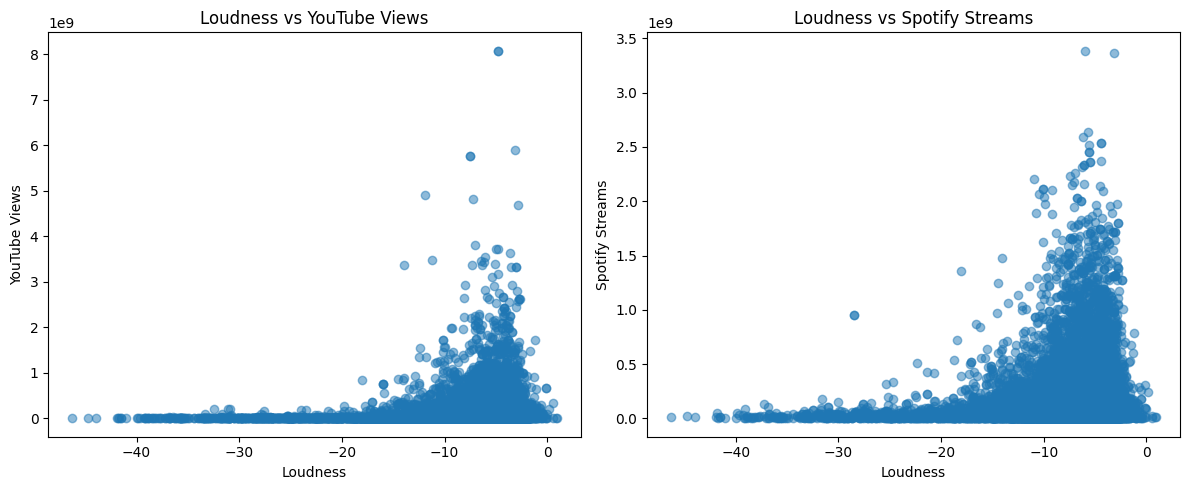

In [11]:
# Visualizes the correlation between Loudness and views and streams with scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_loudness["Loudness"], df_loudness["Views"], alpha=0.5)
plt.xlabel("Loudness")
plt.ylabel("YouTube Views")
plt.title("Loudness vs YouTube Views")

plt.subplot(1, 2, 2)
plt.scatter(df_loudness["Loudness"], df_loudness["Stream"], alpha=0.5)
plt.xlabel("Loudness")
plt.ylabel("Spotify Streams")
plt.title("Loudness vs Spotify Streams")

plt.tight_layout()
plt.show()

Question 5: "Do songs with higher valence (more positive mood) get more comments on YouTube?"

In [12]:
# Drops rows with missing Valence or Comments values
df_valence = df.dropna(subset=["Valence", "Comments"])

# Calculates the correlation between valence and YouTube comments
val_correlation = df_valence["Valence"].corr(df_valence["Comments"])
print(f"Correlation between valence and YouTube comments: {val_correlation:.4f}")

# Answers the question based on the correlation
if val_correlation > 0.1:
    print("Songs with higher valence tend to get more comments on YouTube.")
elif val_correlation < -0.1:
    print("Songs with higher valence tend to get fewer comments on YouTube.")
else:
    print("There's not much of a relationship between valence and YouTube comments.")

Correlation between valence and YouTube comments: 0.0174
There's not much of a relationship between valence and YouTube comments.


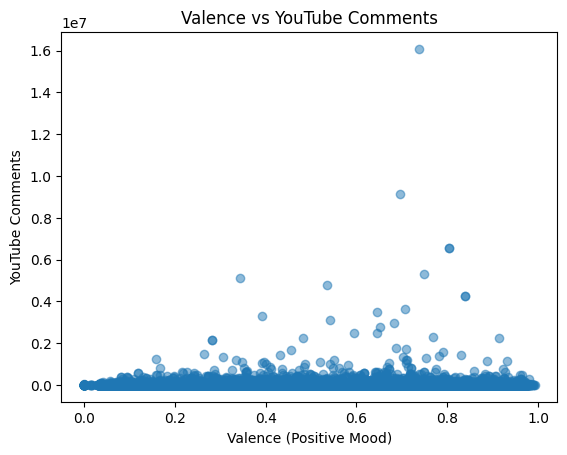

In [13]:
# Visualizes the correlation with a scatter plot
plt.scatter(df_valence["Valence"], df_valence["Comments"], alpha=0.5)
plt.xlabel("Valence (Positive Mood)")
plt.ylabel("YouTube Comments")
plt.title("Valence vs YouTube Comments")
plt.show()

Question 6: "Do tracks with longer durations in milliseconds receive more Spotify streams?"

In [14]:
# Drops rows with missing Duration or Stream values
df_duration = df.dropna(subset=["Duration_ms", "Stream"])

# Calculates the correlation between Duration and Spotify streams
duration_correlation = df_duration["Duration_ms"].corr(df_duration["Stream"])
print(f"Correlation between Duration and Spotify streams: {duration_correlation:.4f}")

# Answers the question based on the correlation
if duration_correlation > 0.1:
    print("Songs with longer duration tend to get more streams on Spotify.")
elif duration_correlation < -0.1:
    print("Songs with longer duration tend to get fewer streams on Spotify.")
else:
    print("There's not much of a relationship between Duration and Spotify streams.")

Correlation between Duration and Spotify streams: -0.0104
There's not much of a relationship between Duration and Spotify streams.


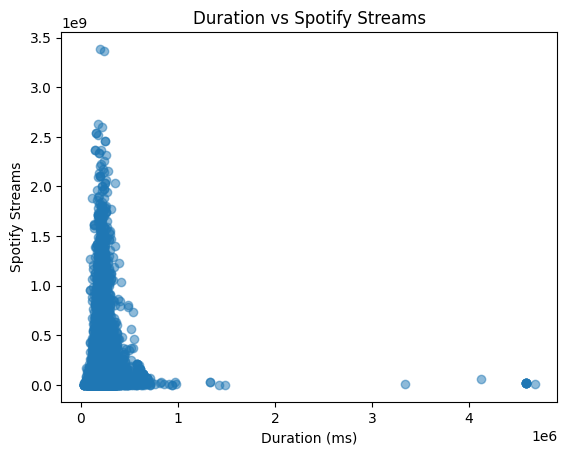

In [15]:
# Visualizes the correlation with a scatter plot
plt.scatter(df_duration["Duration_ms"], df_duration["Stream"], alpha=0.5)
plt.xlabel("Duration (ms)")
plt.ylabel("Spotify Streams")
plt.title("Duration vs Spotify Streams")
plt.show()

Question 7: "Do licensed videos receive more YouTube views than unlicensed ones?"

In [16]:
# Drops rows where either 'Licensed' or 'Views' is missing
df_licensed = df.dropna(subset=['Licensed', 'Views'])

# Groups by 'Licensed' and calculates the average YouTube views
avg_views_by_license = df_licensed.groupby('Licensed')['Views'].mean()

print("Average YouTube views for licensed videos:", avg_views_by_license.get(True, "N/A"))
print("Average YouTube views for unlicensed videos:", avg_views_by_license.get(False, "N/A"))

if avg_views_by_license.get(True, 0) > avg_views_by_license.get(False, 0):
    print("Licensed videos get more views on YouTube on average.")
elif avg_views_by_license.get(True, 0) < avg_views_by_license.get(False, 0):
    print("Unlicensed videos get more views on YouTube on average.")
else:
    print("They get about the same views on average.")

Average YouTube views for licensed videos: 121161134.11810467
Average YouTube views for unlicensed videos: 30915940.713326786
Licensed videos get more views on YouTube on average.


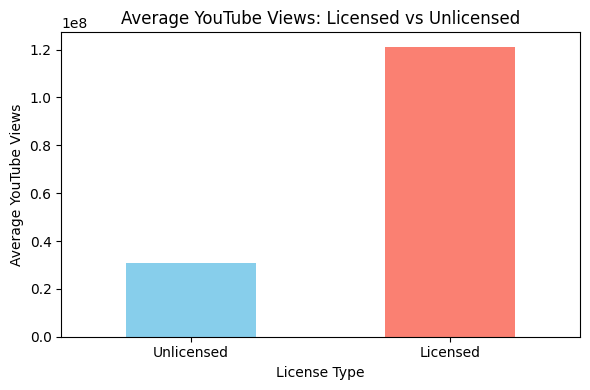

In [17]:
# Visualizes the average YouTube views for licensed vs. unlicensed videos
plt.figure(figsize=(6,4))
avg_views_by_license.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average YouTube Views: Licensed vs Unlicensed')
plt.ylabel('Average YouTube Views')
plt.xlabel('License Type')
plt.xticks([0,1], ['Unlicensed', 'Licensed'], rotation=0)
plt.tight_layout()
plt.show()

Question 8: "Do songs with higher energy levels receive more likes on YouTube?"

Correlation between energy and YouTube likes: 0.0628


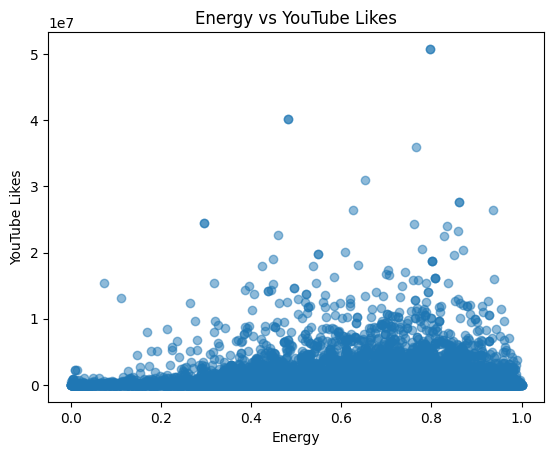

There's not much of a relationship between energy and YouTube likes.


In [18]:
# Drops rows with missing Energy or Likes values
df_energy = df.dropna(subset=["Energy", "Likes"])

# Calculates the correlation between energy and YouTube likes
energy_likes_corr = df_energy["Energy"].corr(df_energy["Likes"])
print(f"Correlation between energy and YouTube likes: {energy_likes_corr:.4f}")

# Visualizes the relationship with a scatter plot
plt.scatter(df_energy["Energy"], df_energy["Likes"], alpha=0.5)
plt.xlabel("Energy")
plt.ylabel("YouTube Likes")
plt.title("Energy vs YouTube Likes")
plt.show()

# Answers the question based on the correlation
if energy_likes_corr > 0.1:
    print("Songs with higher energy tend to get more likes on YouTube.")
elif energy_likes_corr < -0.1:
    print("Songs with higher energy tend to get fewer likes on YouTube.")
else:
    print("There's not much of a relationship between energy and YouTube likes.")

Question 9: "How high up is Ado on Spotify and YouTube?"

In [19]:
# Finds Ado's rank by total YouTube views and Spotify streams among all artists
artist_name = 'Ado'

# Calculates total Views and Streams for each artist
ado_total = df.groupby('Artist').agg({'Views': 'sum', 'Stream': 'sum'}).reset_index()

# Ranks by YouTube Views (descending)
ado_total['YouTube_Rank'] = ado_total['Views'].rank(method='min', ascending=False)

# Ranks by Spotify Streams (descending)
ado_total['Spotify_Rank'] = ado_total['Stream'].rank(method='min', ascending=False)

# Find Ado's row (case-insensitive)
ado_row = ado_total[ado_total['Artist'].str.lower() == artist_name.lower()]
if not ado_row.empty:
    print(f"Ado's YouTube rank by total views: {int(ado_row['YouTube_Rank'].values[0])}")
    print(f"Ado's Spotify rank by total streams: {int(ado_row['Spotify_Rank'].values[0])}")
else:
    print('Ado not found in the dataset.')

Ado's YouTube rank by total views: 640
Ado's Spotify rank by total streams: 1311


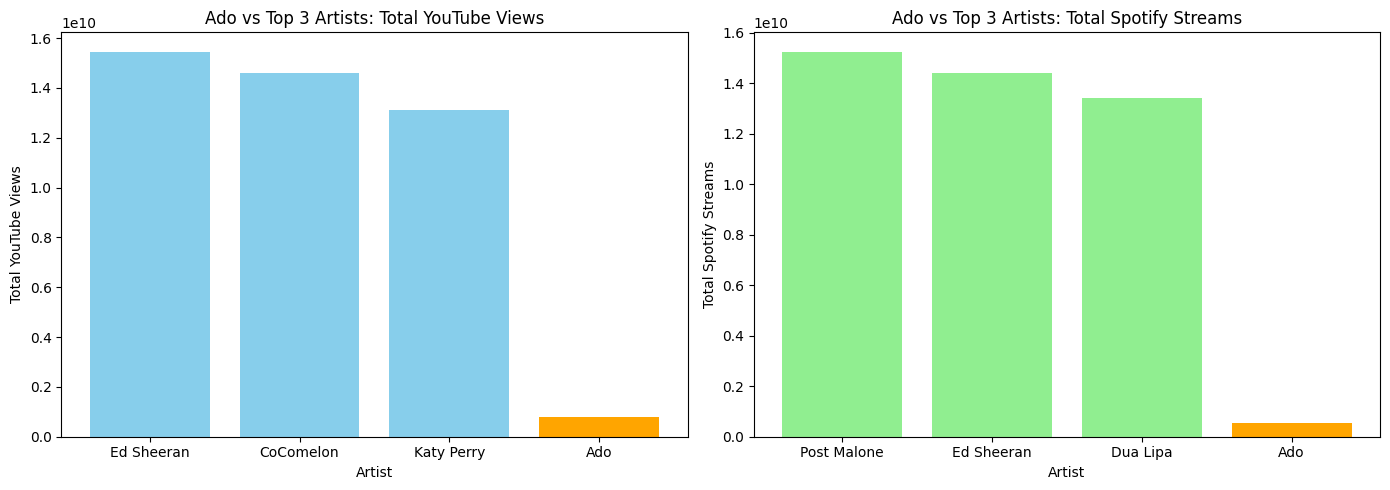

In [ ]:
# Gets top 3 artists by YouTube views
top3_youtube = ado_total.nlargest(3, 'Views')
# Gets top 3 artists by Spotify streams
top3_spotify = ado_total.nlargest(3, 'Stream')

# Adds Ado if she's not already in the top 3
ado_row = ado_total[ado_total['Artist'].str.lower() == 'ado']
if not ado_row.empty:
    if 'Ado' not in top3_youtube['Artist'].values:
        top3_youtube = pd.concat([top3_youtube, ado_row], ignore_index=True)
    if 'Ado' not in top3_spotify['Artist'].values:
        top3_spotify = pd.concat([top3_spotify, ado_row], ignore_index=True)

# Removes duplicates in case Ado is already in top 3
top3_youtube = top3_youtube.drop_duplicates(subset='Artist')
top3_spotify = top3_spotify.drop_duplicates(subset='Artist')

# Creates subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for YouTube Views
axes[0].bar(
    top3_youtube['Artist'],
    top3_youtube['Views'],
    color=['orange' if artist.lower() == 'ado' else 'skyblue' for artist in top3_youtube['Artist']]
)
axes[0].set_title("Ado vs Top 3 Artists: Total YouTube Views")
axes[0].set_ylabel("Total YouTube Views")
axes[0].set_xlabel("Artist")

# Bar chart for Spotify Streams
axes[1].bar(
    top3_spotify['Artist'],
    top3_spotify['Stream'],
    color=['orange' if artist.lower() == 'ado' else 'lightgreen' for artist in top3_spotify['Artist']]
)
axes[1].set_title("Ado vs Top 3 Artists: Total Spotify Streams")
axes[1].set_ylabel("Total Spotify Streams")
axes[1].set_xlabel("Artist")

plt.tight_layout()
plt.show()

Question 10: "Which key is most commonly used across all tracks in the dataset?"

The most commonly used key is: 0.0 (used in 2305 tracks)


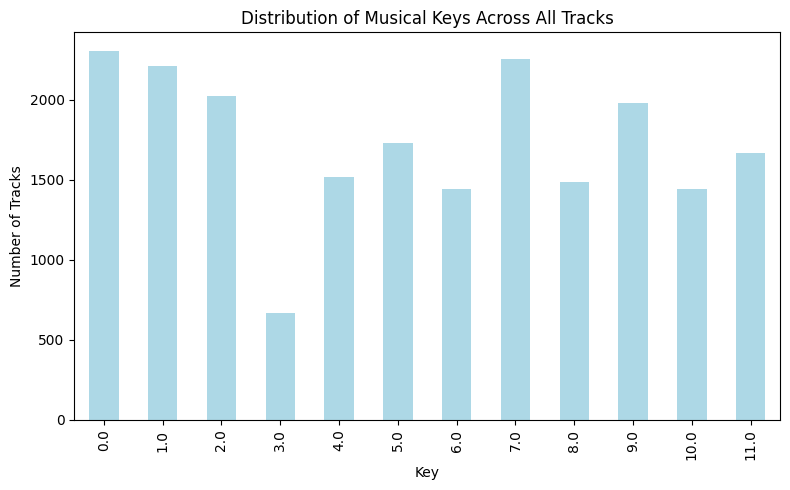

In [ ]:
# Drops rows with missing Key values
df_key = df.dropna(subset=["Key"])

# Finds the most common key (mode)
most_common_key = df_key["Key"].mode()[0]
most_common = (df_key["Key"] == most_common_key).sum()

print(f"The most commonly used key is: {most_common_key} (used in {most_common} tracks)")

# Visualizes the distribution of keys
plt.figure(figsize=(8,5))
df_key["Key"].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.xlabel("Key")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Musical Keys Across All Tracks")
plt.tight_layout()
plt.show()